# Prepared By:
- Sara Alharbi
- Ruba Alotaibi
- Lena Alenazi

# Comparative Analysis of Machine Learning Models on the Iris Dataset
## 1. Data Preprocessing
 • Load the Iris dataset.

 • Perform data exploration and visualization.

 • Check for missing values and handle them if any.

 • Split the dataset into features and target variables.

## 2. Unsupervised Learning: Clustering and Outlier Detection:
 • Apply K-means clustering algorithm to cluster the data.

 • Visualize the clusters.

 • Detect outliers using appropriate techniques such as isolation forest or DBSCAN.

 • Evaluate the clustering results.

## 3. Supervised Learning: Baseline Model:
 • Choose an appropriate evaluation metric based on the problem (classification).

 • Split the dataset into training and testing sets.

 • Build a baseline model (e.g., logistic regression or decision tree) using default parameters.

 • Evaluate the baseline model's performance.

## 4. Model Comparison:
 • Select 3-4 machine learning algorithms (e.g., SVM, Random Forest, Gradient Boosting) suitable for the problem.

 • Implement each algorithm and evaluate its performance using cross-validation.

 • Compare the performance of algorithms based on evaluation metrics.

 • Select the best-performing algorithm.

## 5. Model Tuning and Ensemble:
 • Perform hyperparameter tuning on the best-performing algorithm using Grid Search or Random Search.

 • Evaluate the tuned model's performance.

 • Implement an ensemble of the top-performing algorithms and compare its performance with the tuned model.

## 6. Documentation and Presentation:
 • Provide a clear and concise report documenting the project process, including data preprocessing, model implementation, evaluation, and conclusions.

 • Prepare a presentation summarizing the key findings and insights from the project.

In [2]:
#Imports
from sklearn.datasets import load_iris
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score , make_scorer , classification_report , precision_score, recall_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import VotingClassifier

# Data Preprocessing

In [3]:
# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

In [4]:
# Convert to DataFrame
iris_df = pd.DataFrame(X, columns=iris.feature_names)
iris_df['species'] = y

In [5]:
iris_df['species'].unique() # 0:setosa 1:versicolor 2:virginica

array([0, 1, 2])

In [6]:
# Display the first few rows of the dataset
print("First few rows of the Iris dataset:")
print(iris_df.head())

# Perform data exploration and visualization
print("\nSummary statistics:")
#print(iris_df.describe())
print(iris_df.info())


First few rows of the Iris dataset:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   species  
0        0  
1        0  
2        0  
3        0  
4        0  

Summary statistics:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float6

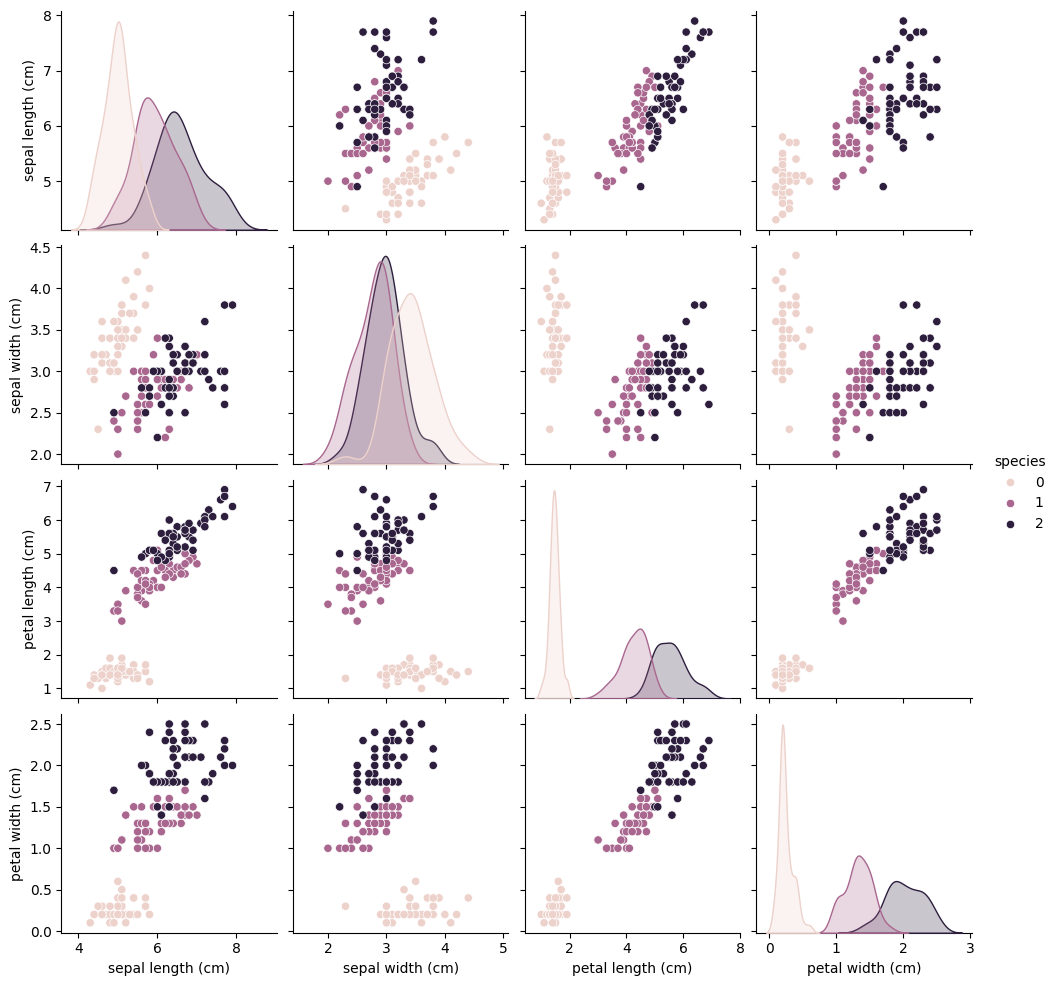

In [7]:
# Visualize the dataset
sns.pairplot(iris_df, hue='species')
plt.show()

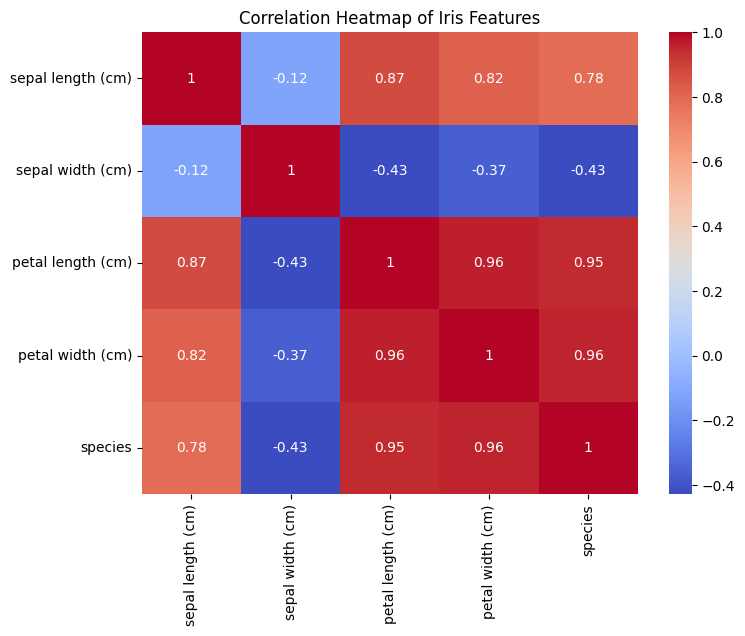

In [8]:
plt.figure(figsize=(8, 6))
sns.heatmap(iris_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Iris Features')
plt.show()

In [9]:
# Check for missing values
print("\nMissing values:")
print(iris_df.isnull().sum())


Missing values:
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64


No null values

In [10]:
# Split the dataset into features and target variables
X = iris_df.drop('species', axis=1)  # Features
y = iris_df['species']  # Target variable

print("\nFeatures (X):")
print(X.head())
print("\nTarget variable (y):")
print(y.head())


Features (X):
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

Target variable (y):
0    0
1    0
2    0
3    0
4    0
Name: species, dtype: int64


# Unsupervised learning : Clustring

In [ ]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X) #Features

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

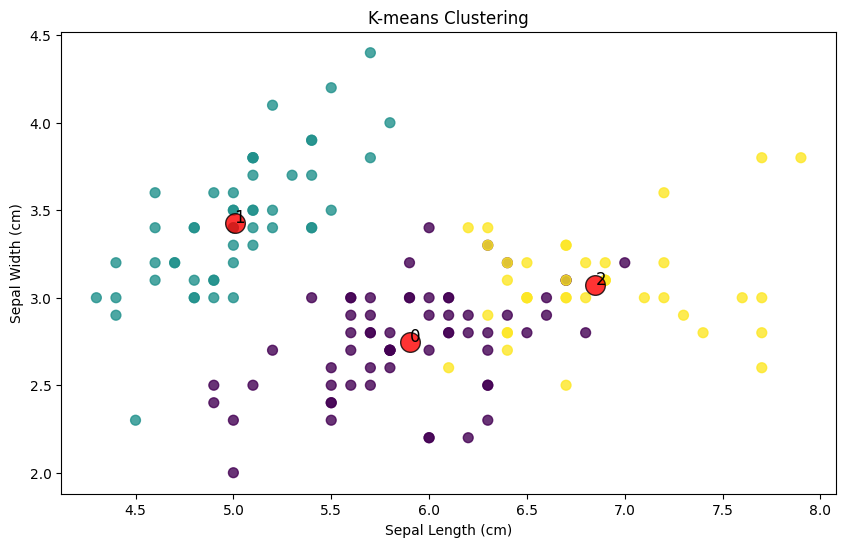

In [ ]:
# Visualize the clusters
plt.figure(figsize=(10, 6))

# Plot data points with cluster labels
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=kmeans.labels_, cmap='viridis', s=50, alpha=0.8)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', s=200, alpha=0.8, marker='o', edgecolors='k')

# Add labels for each cluster
for i, target in enumerate(iris_df['species'].unique()):
    plt.text(X[kmeans.labels_ == i].iloc[:, 0].mean(), X[kmeans.labels_ == i].iloc[:, 1].mean(), target, fontsize=12, color='black')

plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('K-means Clustering')
plt.show()
# 0:setosa 1:versicolor 2:virginica

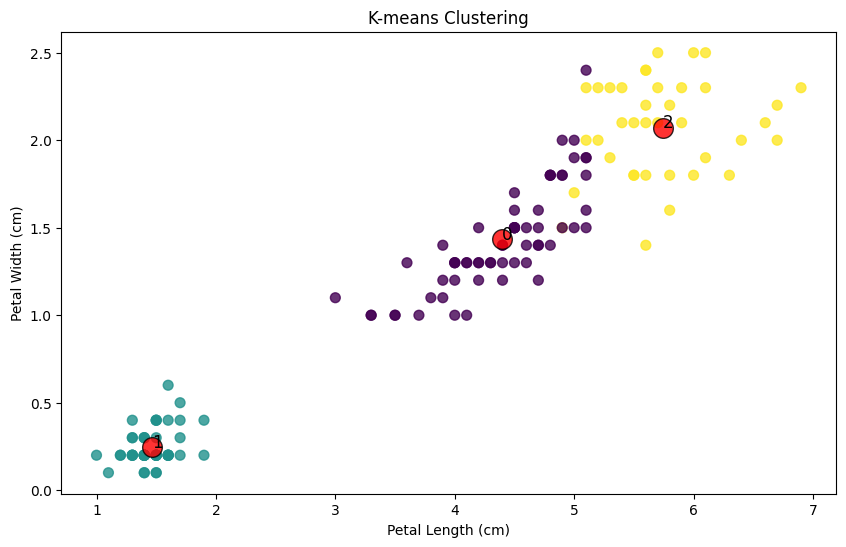

In [ ]:
plt.figure(figsize=(10, 6))

# Plot data points with cluster labels
plt.scatter(X.iloc[:, 2], X.iloc[:, 3], c=kmeans.labels_, cmap='viridis', s=50, alpha=0.8)
plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:, 3], c='red', s=200, alpha=0.8, marker='o', edgecolors='k')

# Add labels for each cluster
for i, target in enumerate(iris_df['species'].unique()):
    plt.text(X[kmeans.labels_ == i].iloc[:, 2].mean(), X[kmeans.labels_ == i].iloc[:, 3].mean(), target, fontsize=12, color='black')

plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('K-means Clustering')
plt.show()


In [ ]:
# Detect outliers using DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
outliers_dbscan = dbscan.fit_predict(X)

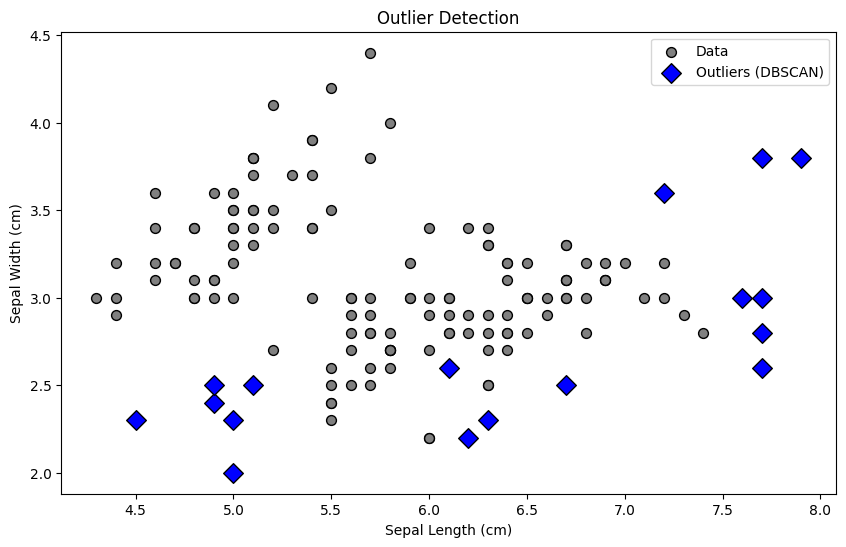

In [ ]:
# Evaluate the clustering results (visualize outliers)
plt.figure(figsize=(10, 6))
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c='gray', s=50, marker='o', edgecolors='black', label='Data')
plt.scatter(X[outliers_dbscan == -1].iloc[:, 0], X[outliers_dbscan == -1].iloc[:, 1], c='blue', s=100, marker='D', edgecolors='black', label='Outliers (DBSCAN)')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Outlier Detection')
plt.legend()
plt.show()

In [ ]:
# Calculate silhouette score
silhouette_avg = silhouette_score(X, kmeans.labels_)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.5528190123564095


silhouette score of 0.5528 suggests that the clusters are well-separated and that the samples are relatively well-clustered within their respective clusters.


# Supervised Learning: Baseline Model

Choose an appropriate evaluation metric based on the problem (classification):
We will choose accuracy

In [11]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=5)

In [12]:
# Build a baseline model (e.g., logistic regression or decision tree) using default parameters
# We choose logistic regression as a baseline
baseline_model = LogisticRegression(solver='newton-cg', multi_class='multinomial')
baseline_model.fit(X_train, y_train)

LogisticRegression(multi_class='multinomial', solver='newton-cg')

In [13]:
#  Evaluate the baseline model's performance
y_predict = baseline_model.predict(X_test)
baseline_accuracy = accuracy_score(y_predict , y_test)
print("Logistic Regression baseline model accuracy: ", baseline_accuracy)

Logistic Regression baseline model accuracy:  0.9833333333333333


In [14]:
# Generate classification report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      0.95      0.98        21
           2       0.95      1.00      0.97        19

    accuracy                           0.98        60
   macro avg       0.98      0.98      0.98        60
weighted avg       0.98      0.98      0.98        60



The model achieved perfect accuracy on the testing set.

# Model Comparison

We will choose 3 model to compare it with baseline model (LR)

In [15]:
# Select 3-4 machine learning algorithms (e.g., SVM, Random Forest, Gradient Boosting) suitable for the problem.
# We choose Decision Tree , random forest and SVM
classifiers = [
    ('Decision Tree', DecisionTreeClassifier(random_state=5)),
    ('Random Forest', RandomForestClassifier(random_state=5)),
    ('Support Vector Machine', SVC(random_state=5))
]

pipelines = []
for clf_name, clf in classifiers:
    pipeline = Pipeline([
        ('classifier', clf)
    ])
    pipelines.append((clf_name, pipeline))

In [16]:
# Evaluate each classifier using cross-validation
scorer_precision = make_scorer(precision_score, average='weighted')
scorer_recall = make_scorer(recall_score, average='weighted')

for clf_name , pipeline in pipelines:
  scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='accuracy')
  precision = cross_val_score(pipeline, X_train, y_train, cv=5, scoring=scorer_precision)
  recall = cross_val_score(pipeline, X_train, y_train, cv=5, scoring=scorer_recall)

  print(f'{clf_name}:')
  print(f'Mean accuracy: {scores.mean():.4f} ', f'Mean precision: {precision.mean():.4f}' , f'Mean recall: {recall.mean():.4f}\n')

Decision Tree:
Mean accuracy: 0.9444  Mean precision: 0.9495 Mean recall: 0.9444

Random Forest:
Mean accuracy: 0.9556  Mean precision: 0.9622 Mean recall: 0.9556

Support Vector Machine:
Mean accuracy: 0.9556  Mean precision: 0.9622 Mean recall: 0.9556



The baseline model (Logistic Regression) achieved perfect accuracy on the testing set, while other models achieved slightly lower accuracy but still performed well. Among the alternative models, Support Vector Machine (SVM) and Random Forest they have the highest mean accuracy (0.9556), indicating stable performance across different folds.

# Model Tuning and Ensemble

In [ ]:
# Define hyperparameters grid for each classifier
param_grids = {
    'Decision Tree': {'classifier__max_depth': [5,10, 15] , 'classifier__random_state': [5 , 90 , 200, 199 , 180 , 188 , 190 ]},
    'Random Forest': {'classifier__max_depth': [3, 5, 10, 15, None],'classifier__n_estimators': [50, 100, 200, 300, 500],'classifier__min_samples_leaf': [1, 2, 4] },
    'Support Vector Machine': {'classifier__C': [0.1, 1, 10 , 100], 'classifier__gamma': ['scale', 'auto'] , 'classifier__kernel': ['poly', 'rbf']}
}

# Perform hyperparameter tuning for each classifier
best_estimators = {}
for clf_name, pipeline in pipelines:
    param_grid = param_grids[clf_name]
    grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_estimators[clf_name] = grid_search.best_estimator_
    print(f'Best hyperparameters for {clf_name}: {grid_search.best_params_}')
    print(f'Best accuracy: {grid_search.best_score_:.4f}\n')

Best hyperparameters for Decision Tree: {'classifier__max_depth': 5, 'classifier__random_state': 200}
Best accuracy: 0.9556

Best hyperparameters for Random Forest: {'classifier__max_depth': 3, 'classifier__min_samples_leaf': 4, 'classifier__n_estimators': 50}
Best accuracy: 0.9667

Best hyperparameters for Support Vector Machine: {'classifier__C': 1, 'classifier__gamma': 'scale', 'classifier__kernel': 'poly'}
Best accuracy: 0.9889



In [17]:
svm_model = None
for clf_name , pipeline in pipelines:
  if clf_name == 'Support Vector Machine':
    svm_model = pipeline.named_steps['classifier']
    break

In [18]:
#  Implement an ensemble of the top-performing algorithms and compare its performance with the tuned model
voting_ensemble = VotingClassifier(estimators=[('SVM', svm_model)], voting='hard')
voting_ensemble.fit(X_train, y_train)

VotingClassifier(estimators=[('SVM', SVC(random_state=5))])

In [19]:
ensemble_accuracy = voting_ensemble.score(X_test, y_test)
print("Ensemble Accuracy:", ensemble_accuracy)

Ensemble Accuracy: 0.9833333333333333


# Results

- **Baseline Model**: The Logistic Regression baseline model achieved an accuracy of 98.33% on the testing data.

- **Models Before Tuning**: Decision Tree achieved performance with an accuracy of approximately 94.44%.
Random forest and Support Vector Machine performed achieved slightly better with an accuracy of 95.56%.

- **Models After Tuning**: After hyperparameter tuning, all models showed improvement in accuracy. Decision Tree accuracy  95.56% , Random forest achieved 96.67%,while Support Vector Machine's accuracy increased to 98.89%.

- **Ensemble Model**: The ensemble model achieved an accuracy of 98.33%, which is higher than the individual SVM before tuning.